<a href="https://colab.research.google.com/github/julioclerio/xgb-boosting_gradiente-boosting/blob/main/notebooks/gradiente_boosting_xgb_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GRADIENTE BOOSTING

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [63]:
def process_data():
    df = pd.read_csv('/content/house_prices.csv')
    X = df.drop(columns=["SalePrice", "Id"])
    y = df["SalePrice"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
    numerical_features = X_train.select_dtypes(exclude=['object']).columns.tolist()

    # Criação de pipelines para pré-processamento
    numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler())
    ])

    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Transformador de coluna para processamento conjunto
    pre_processor = ColumnTransformer([
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

    # Aplicação do pré-processador nos conjuntos de treino e teste
    X_train_processed = pre_processor.fit_transform(X_train)
    X_test_processed = pre_processor.transform(X_test)

    return X_train, X_test, y_train, y_test, pre_processor

In [11]:
# função para avaliar o modelo
def metricas_regressao(estimator):
    # predições de treino
    y_train_pred = estimator.predict(X_train)
    print("\nMétricas de avaliação de treino")
    print(f"R2: { r2_score(y_train, y_train_pred):.2f}")
    print(f"MAE: { mean_absolute_error(y_train, y_train_pred):.2f}")
    print(f"RMSE: { np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}")

    # predições de teste
    y_pred_test = estimator.predict(X_test)

    print("\nMétricas de avaliação de teste")
    print(f"R2: { r2_score(y_test, y_pred_test):.2f}")
    print(f"MAE: { mean_absolute_error(y_test, y_pred_test):.2f}")
    print(f"RMSE: { np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")


In [27]:
from sklearn.ensemble import AdaBoostRegressor


X_train, X_test, y_train, y_test, pre_processor = process_data()


pipe_gb = Pipeline([('pre_process', pre_processor),
                    ("gb", GradientBoostingRegressor(random_state = 55, learning_rate = 0.1, n_estimators = 100))])

pipe_gb.fit(X_train, y_train)

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivA...
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('gb', GradientBoostingRegressor(random_state=55))])

In [24]:
metricas_regressao(pipe_gb)


Métricas de avaliação de treino
R2: 0.97
MAE: 9707.14
RMSE: 13252.99

Métricas de avaliação de teste
R2: 0.91
MAE: 16192.14
RMSE: 25254.55


XGBOOST

In [25]:
!pip install xgboost

In [70]:
from xgboost import XGBClassifier

In [95]:
def process_data():
    df = pd.read_csv('/content/bank-full.csv')
    X = df.drop(columns=["Target"])
    y = df["Target"].apply(lambda x: 1 if x == "yes" else 0)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)

    categorical_features = X.select_dtypes(include=['object']).columns.tolist()
    numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

    # Criação de pipelines para pré-processamento
    numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler())
    ])

    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Transformador de coluna para processamento conjunto
    pre_processor = ColumnTransformer([
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

    # Aplicação do pré-processador nos conjuntos de treino e teste
    X_train_processed = pre_processor.fit_transform(X_train)
    X_test_processed = pre_processor.transform(X_test)

    return X_train_processed, X_test_processed, y_train, y_test, X, y

In [96]:
from sklearn.metrics import classification_report

# Processamento dos dados
X_train_processed, X_test_processed, y_train, y_test, X, y = process_data()

# Treinamento do modelo XGBoost
xgb = XGBClassifier(device='gpu', n_estimators = 1000)
xgb.fit(X_train_processed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

UTLIZANDO O GRID SEARCH

Acurácia: 0.9064435269831908
Precisão: 0.6358974358974359
Recall: 0.46880907372400754
F1-Score: 0.5397170837867247
AUC-ROC: 0.7166204506968539
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11977
           1       0.64      0.47      0.54      1587

    accuracy                           0.91     13564
   macro avg       0.78      0.72      0.74     13564
weighted avg       0.90      0.91      0.90     13564

Melhores parâmetros encontrados:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


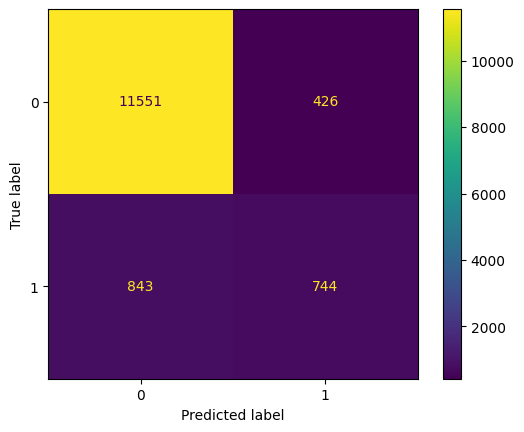

In [102]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

xgb = XGBClassifier(device='gpu')

grid_search_xgb = GridSearchCV(estimator = xgb,
                           param_grid = param_grid_xgb,
                           cv=3,
                           scoring='accuracy',
                           n_jobs=-1,
                           )

# Treinando o modelo com os melhores parâmetros encontrados
grid_search_xgb.fit(X_train_processed, y_train)

# Fazendo previsões no conjunto de teste
y_pred_xgb = grid_search_xgb.predict(X_test_processed)

# Calculando métricas de avaliação
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test,y_pred_xgb)
f1 = f1_score(y_test,y_pred_xgb)
roc_auc = roc_auc_score(y_test, y_pred_xgb)

# Exibindo as métricas
print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"AUC-ROC: {roc_auc}")
print(classification_report(y_test, y_pred_xgb))

# Criando a matriz de confusão
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay(cm_xgb).plot()

# Melhores parametros
best_params_xgb_grid = grid_search_xgb.best_params_
print("Melhores parâmetros encontrados:")
print(best_params_xgb_grid)


UTILIZANDO O RANDOMIZED SEARCH CV

Acurácia: 0.9051199823067566
Precisão: 0.6458072590738423
Recall: 0.47296058661778184
F1-Score: 0.5460317460317461
AUC-ROC: 0.7186860277153296
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7952
           1       0.65      0.47      0.55      1091

    accuracy                           0.91      9043
   macro avg       0.79      0.72      0.75      9043
weighted avg       0.90      0.91      0.90      9043

Melhores parâmetros encontrados:
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 103}


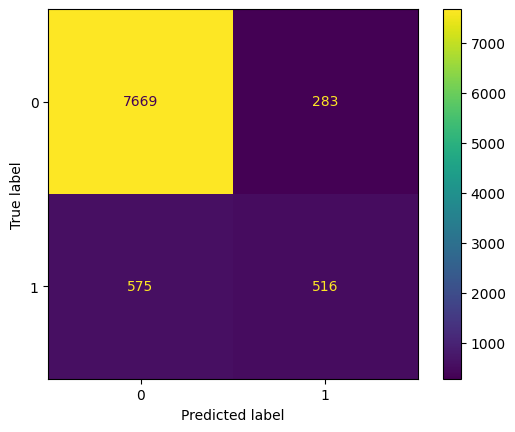

In [112]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist_random = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

xgb = XGBClassifier(device='gpu')

grid_search_xgb_random = RandomizedSearchCV(estimator = xgb,
                           param_distributions = param_dist_random,
                           cv=3,
                           scoring='accuracy',
                           n_jobs=-1,
                           )

# Treinando o modelo com os melhores parâmetros encontrados
grid_search_xgb_random.fit(X_train_processed, y_train)

# Fazendo previsões no conjunto de teste
y_pred_xgb = grid_search_xgb_random.predict(X_test_processed)

# Calculando métricas de avaliação
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test,y_pred_xgb)
f1 = f1_score(y_test,y_pred_xgb)
roc_auc = roc_auc_score(y_test, y_pred_xgb)

# Exibindo as métricas
print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"AUC-ROC: {roc_auc}")
print(classification_report(y_test, y_pred_xgb))

# Criando a matriz de confusão
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay(cm_xgb).plot()


# Melhores parametros
best_params_xgb_random = grid_search_xgb_random.best_params_
print("Melhores parâmetros encontrados:")
print(best_params_xgb_random)

UTILIZANDO METODO BORUTA

In [103]:
pip install boruta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.3 MB/s eta 0:00:00


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	51
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	51
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	51
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	51
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	51
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	51
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	51
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	16
Tentative: 	11
Rejected: 	24
Iteration: 	9 / 100
Confirmed: 	16
Tentative: 	11
Rejected: 	24
Iteration: 	10 / 100
Confirmed: 	16
Tentative: 	11
Rejected: 	24
Iteration: 	11 / 100
Confirmed: 	16
Tentative: 	11
Rejected: 	24
Iteration: 	12 / 100
Confirmed: 	19
Tentative: 	6
Rejected: 	26
Iteration: 	13 / 100
Confirmed: 	19
Tentative: 	6
Rejected: 	26
Iteration: 	14 / 100
Confirmed: 	19
Tentative: 	6
Rejected: 	26
Iteration: 	15 / 100
Confirmed: 	19
Tentative: 	6
Rejected: 	26
Iteration: 	16 / 100
Confirmed: 	20
Tentative: 	5
Re

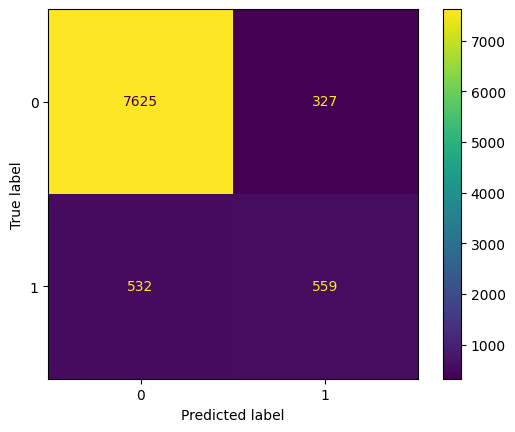

In [110]:
from boruta import BorutaPy
from xgboost import XGBClassifier


df = pd.read_csv('/content/bank-full.csv')
X = df.drop(columns=["Target"])
y = df["Target"].apply(lambda x: 1 if x == "yes" else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y , shuffle=True, test_size = 0.2, random_state = 42)


categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_features = X_train.select_dtypes(exclude=['object']).columns.tolist()

# Criação de pipelines para pré-processamento
numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler())
    ])

categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

# Transformador de coluna para processamento conjunto
pre_processor = ColumnTransformer([
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Aplicação do pré-processador nos conjuntos de treino e teste
X_train_processed = pre_processor.fit_transform(X_train)
X_test_processed = pre_processor.transform(X_test)

# Inicialize o seletor de features Boruta
xgb = XGBClassifier()
boruta_selector = BorutaPy(xgb, n_estimators='auto', verbose=2, random_state=42)

# Treine o seletor de features Boruta
boruta_selector.fit(X_train_processed, y_train)

# Obtenha as features selecionadas
X_train_selected = boruta_selector.transform(X_train_processed)
X_test_selected = boruta_selector.transform(X_test_processed)

# Inicialize o classificador XGBoost
xgb_selected = XGBClassifier()

# Treine o modelo usando apenas as features selecionadas
xgb_selected.fit(X_train_selected, y_train)

# Faça previsões no conjunto de teste
y_pred_xgb_selected = xgb_selected.predict(X_test_selected)

# Exiba as métricas de avaliação
print(classification_report(y_test, y_pred_xgb_selected))

# Crie a matriz de confusão
cm_xgb_selected = confusion_matrix(y_test, y_pred_xgb_selected)
ConfusionMatrixDisplay(cm_xgb_selected).plot()

In [113]:


df = pd.read_csv('/content/bank-full.csv')

In [114]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
